In [2]:
from google.colab import drive
drive.mount('/content/drive')

from textblob import TextBlob
from wordcloud import WordCloud
import os
import torch
import numpy as np
import pandas as pd
import sklearn
import random
import math
import nltk
import re
import matplotlib.pyplot as plt

### nltk import
from nltk.stem import WordNetLemmatizer, PorterStemmer, LancasterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer, WordPunctTokenizer
from nltk.corpus import stopwords
# nltk.download('punkt')
# nltk.download('wordnet')

### sklearn
from sklearn.linear_model import LogisticRegressionCV
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB

nltk.download('punkt')
nltk.download('wordnet')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# A. Function Defination

## 1. tokenization and bag of words

In [ ]:
### tokenization functions

def word_extraction(sentence):
    """
      split a sentence into a list of words

    """
    ignore = ['a', "the", "is"]
    words = re.sub("[^\w]", " ",  sentence).split()
    cleaned_text = [w.lower() for w in words if w not in ignore]
    return cleaned_text    


def tokenize(sentences):
    """
      get vocabulary of all sentences

    """
    words = []
    for sentence in sentences:
        w = word_extraction(sentence)
        words.extend(w)
        
    words = sorted(list(set(words)))
    return words



def generate_bow(allsentences, process = 0, tk = None): 
    if tk is None:
        vocab = tokenize(allsentences)
    else:
        vocab = tk
        
    pro = 0
    sentence_words = []
    for sentence in allsentences:
        if process != 0:
            pro+=1
            if pro % process == 0:
                print("{0} has done".format(pro))
        words = word_extraction(sentence)
        bag_vector = np.zeros(len(vocab))
        for w in words:
            for i,word in enumerate(vocab):
                if word == w: 
                    bag_vector[i] += 1

        sentence_words.append(bag_vector)
    return vocab, np.array(sentence_words)


def frequency(allsentences, process = 0): 
    vocab = tokenize(allsentences)
    bag_vector = np.zeros(len(vocab))
    pro = 0

    for sentence in allsentences:
        # check process
        if process != 0:
            pro+=1
            if pro % process == 0:
                print("{0} has done".format(pro))

        words = word_extraction(sentence)
        for w in words:
            for i,word in enumerate(vocab):
                if word == w: 
                    bag_vector[i] += 1

    return bag_vector



"""
allsentences = ["Joe waited for the train", "The train was late", "Mary and Samantha took the bus", 
            "I looked for Mary and Samantha at the bus station", 
            "Mary and Samantha arrived at the bus station early but waited until noon for the bus"]

generate_bow(allsentences, process = 2)
"""


'\nallsentences = ["Joe waited for the train", "The train was late", "Mary and Samantha took the bus", \n            "I looked for Mary and Samantha at the bus station", \n            "Mary and Samantha arrived at the bus station early but waited until noon for the bus"]\n\ngenerate_bow(allsentences, process = 2)\n'

## 2. preprocessing functions

### a) main functions

Main structure building of functions

In [ ]:
def altogether(allSentence):
    for s in range(len(allSentence)):

        # transfer to strings
        allSentence[s] = str(allSentence[s])

        # remove URLs, symbols
        allSentence[s] = removeIrrelativeTerms(allSentence[s])

        # to lower letters
        allSentence[s] = allSentence[s].lower()

        # remove "_"
        allSentence[s] = removeDash(allSentence[s])

        # remove punctations
        allSentence[s] = removePunct(allSentence[s])

        # remove numbers
        allSentence[s] = removeNumbers(allSentence[s])

        # stemming
        allSentence[s] = stemSentence(allSentence[s])

        # lemmatization
        allSentence[s] = lemmaSentence(allSentence[s])

    return allSentence


Stop words

In [ ]:
import nltk
nltk.download('stopwords')
stop_words = list(set(stopwords.words('english')))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### b) Sub functions

sub steps composed of main functions.

try to add or remove some if needed

In [ ]:
# sub functions
def stemSentence(sentence):
    token_words=word_tokenize(sentence)
    porter = PorterStemmer()

    stem_sentence=[]
    for word in token_words:
        stem_sentence.append(porter.stem(word))
        stem_sentence.append(" ")

    return "".join(stem_sentence)

def lemmaSentence(sentence):
    token_words=word_tokenize(sentence)
    wordnet_lemmatizer = WordNetLemmatizer()

    lemma_sentence=[]
    for word in token_words:
        lemma_sentence.append(wordnet_lemmatizer.lemmatize(word, pos="v"))
        lemma_sentence.append(" ")

    return "".join(lemma_sentence)

def toLower(sentence):
    return str(sentence).lower()

########## remove parts ##########
def removePunct(sentence, punctuations="?:!.,;_"):
    token_words=word_tokenize(sentence)

    for word in token_words:
        if word in punctuations:
            token_words.remove(word)

    return " ".join(token_words)

def removeIrrelativeTerms(sentence):
    sentence = re.sub(r'@[A-Za-z0-9]+', '', str(sentence))
    sentence = re.sub(r'#', '', sentence)
    sentence = re.sub(r'RT', '', sentence)
    sentence = re.sub(r'https?:\/\/\S+', '', sentence)    # remove URL
    sentence = re.sub('\s+', ' ', sentence)
    sentence = re.sub("\'", '', sentence)
    sentence = re.sub(r'\W', ' ', sentence)

    return sentence

def removeDash(sentence):
    return sentence.replace("_", "")

def removeNumbers(sentence):
    return re.sub(r'[0-9]', '', sentence)


## 3. get features

In [ ]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

def getAnalysis(score):
    if score < 0:
        return 'negative'
    elif score == 0:
        return 'neutral'
    else:
        return 'positive'

def removeNan(text):
    if str(text) == "nan":
        return "neutral"
    else:
        return text


## 4. Evaluation

# B. Download Data

In [4]:
# download content from Kaggle
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

! kaggle datasets download -d gpreda/all-covid19-vaccines-tweets
! unzip all-covid19-vaccines-tweets.zip

pre_data = pd.read_csv('vaccination_all_tweets.csv')

 90% 27.0M/29.9M [00:00<00:00, 29.5MB/s]
100% 29.9M/29.9M [00:00<00:00, 50.8MB/s]
Archive:  all-covid19-vaccines-tweets.zip
  inflating: vaccination_all_tweets.csv  


In [8]:
data = pd.read_csv('/content/drive/MyDrive/Tilburg/tweet_dataset.csv').dropna(subset = ["text", "new_sentiment"])
data = data.reset_index()

data_tweet = data['text'].tolist()

# C. Pre-Processing

## 1. clean data

In [ ]:
# replenish data_tweet
data_tweet = data['text']

clean_tweet = altogether(data_tweet.tolist())

In [ ]:
pd.DataFrame(clean_tweet).head()

,0
0,layin n bed with a headach ughhhh waitin on yo...
1,funer ceremoni gloomi friday
2,want to hang out with friend soon
3,we want to trade with someon who ha houston ti...
4,re ping whi didn t you go to prom bc my bf did...


## 2. word cloud

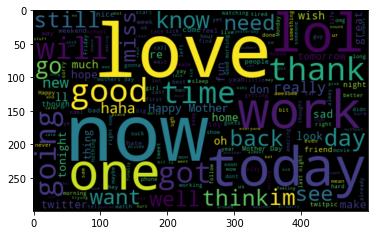

In [ ]:
allWords = ' '.join([str(twts) for twts in data_tweet['text']])
wordcloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allWords)

plt.imshow(wordcloud, interpolation = 'bilinear')

## 3. manipulate data

In [ ]:
# adjust panel data
clean_tweet = pd.Series(clean_tweet)
data_tweet = pd.DataFrame(data['text'])
data_tweet['actualSentiment'] = data['new_sentiment']
data_tweet['actualSentiment'] = data_tweet['actualSentiment'].apply(removeNan)


# add Subjectivity and Polarity
data_tweet['Subjectivity'] = clean_tweet.apply(getSubjectivity)
data_tweet['Polarity'] = clean_tweet.apply(getPolarity)
data_tweet['polarityPrediction'] = data_tweet['Polarity'].apply(getAnalysis)


In [ ]:
# read frequency data done before
freq = pd.read_csv("/content/drive/MyDrive/Tilburg/frequency.csv")
freq.columns = ['words', 'frequencies']
freq = freq.sort_values('frequencies', ascending = False)

freq200 = freq.iloc[:200,0].to_list()

In [ ]:
# get bag of words with top 200 frequent words

vocab, bow = generate_bow(clean_tweet, process = 10, tk = tokenize(freq200))
bow_matrix = pd.DataFrame(bow, columns = vocab)

In [ ]:
data_v1 = pd.concat((data_tweet, bow_matrix), axis = 1)
data_v1.head()

In [ ]:
pre_data.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [ ]:
## pre data
pre_data_tweet = pre_data['text']
pre_clean_tweet = altogether(pre_data_tweet.tolist())

# adjust panel data
pre_clean_tweet = pd.Series(pre_clean_tweet)
pre_data_tweet = pd.DataFrame(pre_data['text'])

# add Subjectivity and Polarity
pre_data_tweet['Subjectivity'] = pre_clean_tweet.apply(getSubjectivity)
pre_data_tweet['Polarity'] = pre_clean_tweet.apply(getPolarity)

pre_vocab, pre_bow = generate_bow(pre_clean_tweet, process = 100, tk = tokenize(freq200))
pre_bow_matrix = pd.DataFrame(pre_bow, columns = pre_vocab)

In [ ]:
# add Subjectivity and Polarity
pre_data_tweet['Subjectivity'] = pre_clean_tweet.apply(getSubjectivity)
pre_data_tweet['Polarity'] = pre_clean_tweet.apply(getPolarity)


In [ ]:
pre_data_v1 = pd.concat((pre_data_tweet, pre_bow_matrix), axis = 1)
pre_data_v1.head()

,text,Subjectivity,Polarity,about,after,again,all,alway,an,and,ani,as,at,awesom,back,bad,be,bed,best,better,but,by,call,can,cant,come,could,d,day,didn,do,don,dont,down,eat,even,everyon,feel,final,find,...,time,tire,to,today,tomorrow,tonight,too,tri,tweet,twitter,u,up,use,ve,veri,wa,wait,want,watch,way,we,week,weekend,well,what,when,where,whi,who,will,win,wish,with,work,would,ye,yeah,year,you,your
0,Same folks said daikon paste could treat a cyt...,0.187500,-0.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,While the world has been on the wrong side of ...,0.900000,-0.500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,0.033333,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,"Facts are immutable, Senator, even when you're...",0.500000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,Explain to me again why we need a vaccine @Bor...,0.000000,0.000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Data Version 1: Basic Token**

In [ ]:
X = data_v1.drop(['text', 'polarityPrediction', 'actualSentiment'], axis = 1)
y = data_v1['actualSentiment']
X, y = shuffle(X, y, random_state = 42)

# change labels to integers
y.replace({"neutral":0, "positive":1, "negative":-1})

X_train_v1, X_test_v1, y_train_v1, y_test_v1 = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [ ]:
# pre_data
pre_X = pre_data_v1.drop(['text'], axis = 1)
pre_X

,Subjectivity,Polarity,about,after,again,all,alway,an,and,ani,as,at,awesom,back,bad,be,bed,best,better,but,by,call,can,cant,come,could,d,day,didn,do,don,dont,down,eat,even,everyon,feel,final,find,first,...,time,tire,to,today,tomorrow,tonight,too,tri,tweet,twitter,u,up,use,ve,veri,wa,wait,want,watch,way,we,week,weekend,well,what,when,where,whi,who,will,win,wish,with,work,would,ye,yeah,year,you,your
0,0.187500,-0.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.900000,-0.500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.033333,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.500000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,0.000000,0.000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228202,0.400000,0.200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
228203,0.800000,0.400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
228204,0.400000,0.200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
228205,0.000000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# D. Classifier

## 1. use polarity to classify

In [ ]:
polarity_acc = np.sum(data_tweet['polarityPrediction'] == data_tweet['actualSentiment']) / len(data_tweet)
polarity_acc

0.5195186568355198

## 2. Naive Bayes Classifier 
The multinomial Naive Bayes classifier is suitable for classification with discrete features (e.g., word counts for text classification). The multinomial distribution normally requires integer feature counts. However, in practice, fractional counts such as tf-idf may also work.

label = tokens


In [ ]:
nbTrainer = MultinomialNB()
nbTrainer.fit(X_train_v1.drop(['Subjectivity', 'Polarity'], axis = 1), y_train_v1)

nb_predict_v1 = nbTrainer.predict(X_test_v1.drop(['Subjectivity', 'Polarity'], axis = 1))
nb_acc_v1 = accuracy_score(nb_predict_v1, y_test_v1)
nb_acc_v1

0.6053303542930099

## 3. Logistic Regression Classifier

label = subjectivity + polarity + tokens

In [ ]:
lrTrainer = LogisticRegressionCV(cv = 5, random_state = 42,
                                 Cs = [0.01,0.1,1,10],
                                 solver = 'newton-cg',
                                 penalty = 'l2')
lrTrainer.fit(X_train_v1, y_train_v1)

lr_predict_v1 = lrTrainer.predict(X_test_v1)
lr_acc_v1 = accuracy_score(lr_predict_v1, y_test_v1)

In [ ]:
lr_acc_v1

0.6449090328758379

In [ ]:
pre_y = lrTrainer.predict(pre_X)
pre_data['sentiment'] = pre_y

array(['neutral', 'positive', 'neutral', ..., 'neutral', 'neutral',
       'neutral'], dtype=object)

In [ ]:
pre_data.to_csv('/content/drive/MyDrive/Tilburg/vaccination_tweet_sentiment.csv')

## 4. CNN

In [ ]:
URL = 'https://www.cs.cornell.edu/people/pabo/movie-review-data/rt-polaritydata.tar.gz'
# Download Datasets
!wget -P 'Data/' $URL
# Unzip
!tar xvzf 'Data/rt-polaritydata.tar.gz' -C 'Data/'

In [ ]:
def load_text(path):
    """Load text data, lowercase text and save to a list."""

    with open(path, 'rb') as f:
        texts = []
        for line in f:
            texts.append(line.decode(errors='ignore').lower().strip())

    return texts

# Load files
neg_text = load_text('Data/rt-polaritydata/rt-polarity.neg')
pos_text = load_text('Data/rt-polaritydata/rt-polarity.pos')

# Concatenate and label data
texts = np.array(neg_text + pos_text)
labels = np.array([0]*len(neg_text) + [1]*len(pos_text))

In [ ]:
%%time
URL = "https://dl.fbaipublicfiles.com/fasttext/vectors-english/crawl-300d-2M.vec.zip"
FILE = "fastText"

if os.path.isdir(FILE):
    print("fastText exists.")
else:
    !wget -P $FILE $URL
    !unzip $FILE/crawl-300d-2M.vec.zip -d $FILE

In [ ]:
my_texts = np.array(data['text'])
my_labels = np.array(data['new_sentiment'])

for i in range(31329):
    if my_labels[i] =='positive':
        my_labels[i] = 2
    elif my_labels[i] =='negative':
        my_labels[i] = 0
    elif my_labels[i] =='neutral':
        my_labels[i] = 1
    else:
        raise ValueError

In [ ]:
if torch.cuda.is_available():       
    device = torch.device("cuda")
    print(f'There are {torch.cuda.device_count()} GPU(s) available.')
    print('Device name:', torch.cuda.get_device_name(0))

else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
Device name: Tesla K80


### 1. tokenization

In [ ]:
from nltk.tokenize import word_tokenize
from collections import defaultdict

def tokenize(texts):
    """Tokenize texts, build vocabulary and find maximum sentence length.
    
    Args:
        texts (List[str]): List of text data
    
    Returns:
        tokenized_texts (List[List[str]]): List of list of tokens
        word2idx (Dict): Vocabulary built from the corpus
        max_len (int): Maximum sentence length
    """

    max_len = 0
    tokenized_texts = []
    word2idx = {}

    # Add <pad> and <unk> tokens to the vocabulary
    word2idx['<pad>'] = 0
    word2idx['<unk>'] = 1

    # Building our vocab from the corpus starting from index 2
    idx = 2
    for sent in texts:
        tokenized_sent = word_tokenize(sent)

        # Add `tokenized_sent` to `tokenized_texts`
        tokenized_texts.append(tokenized_sent)

        # Add new token to `word2idx`
        for token in tokenized_sent:
            if token not in word2idx:
                word2idx[token] = idx
                idx += 1

        # Update `max_len`
        max_len = max(max_len, len(tokenized_sent))

    return tokenized_texts, word2idx, max_len

def encode(tokenized_texts, word2idx, max_len):
    """Pad each sentence to the maximum sentence length and encode tokens to
    their index in the vocabulary.

    Returns:
        input_ids (np.array): Array of token indexes in the vocabulary with
            shape (N, max_len). It will the input of our CNN model.
    """

    input_ids = []
    for tokenized_sent in tokenized_texts:
        # Pad sentences to max_len
        tokenized_sent += ['<pad>'] * (max_len - len(tokenized_sent))

        # Encode tokens to input_ids
        input_id = [word2idx.get(token) for token in tokenized_sent]
        input_ids.append(input_id)
    
    return np.array(input_ids)

In [ ]:
from tqdm import tqdm_notebook

def load_pretrained_vectors(word2idx, fname):
    """Load pretrained vectors and create embedding layers.
    
    Args:
        word2idx (Dict): Vocabulary built from the corpus
        fname (str): Path to pretrained vector file

    Returns:
        embeddings (np.array): Embedding matrix with shape (N, d) where N is
            the size of word2idx and d is embedding dimension
    """

    print("Loading pretrained vectors...")
    fin = open(fname, 'r', encoding='utf-8', newline='\n', errors='ignore')
    n, d = map(int, fin.readline().split())

    # Initilize random embeddings
    embeddings = np.random.uniform(-0.25, 0.25, (len(word2idx), d))
    embeddings[word2idx['<pad>']] = np.zeros((d,))

    # Load pretrained vectors
    count = 0
    for line in tqdm_notebook(fin):
        tokens = line.rstrip().split(' ')
        word = tokens[0]
        if word in word2idx:
            count += 1
            embeddings[word2idx[word]] = np.array(tokens[1:], dtype=np.float32)

    print(f"There are {count} / {len(word2idx)} pretrained vectors found.")

    return embeddings

In [ ]:
# Tokenize, build vocabulary, encode tokens
print("Tokenizing...\n")
tokenized_texts, word2idx, max_len = tokenize(my_texts)
input_ids = encode(tokenized_texts, word2idx, max_len)

# Load pretrained vectors
embeddings = load_pretrained_vectors(word2idx, "fastText/crawl-300d-2M.vec")
embeddings = torch.tensor(embeddings)

Tokenizing...

Loading pretrained vectors...


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


0it [00:00, ?it/s]

There are 28924 / 40132 pretrained vectors found.


In [ ]:
from torch.utils.data import (TensorDataset, DataLoader, RandomSampler,
                              SequentialSampler)

def data_loader(train_inputs, val_inputs, train_labels, val_labels,
                batch_size=50):
    """Convert train and validation sets to torch.Tensors and load them to
    DataLoader.
    """

    # Convert data type to torch.Tensor
    train_inputs, val_inputs, train_labels, val_labels =\
    tuple(torch.tensor(data) for data in
          [train_inputs, val_inputs, train_labels, val_labels])

    # Specify batch_size
    batch_size = 50

    # Create DataLoader for training data
    train_data = TensorDataset(train_inputs, train_labels)
    train_sampler = RandomSampler(train_data)
    train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

    # Create DataLoader for validation data
    val_data = TensorDataset(val_inputs, val_labels)
    val_sampler = SequentialSampler(val_data)
    val_dataloader = DataLoader(val_data, sampler=val_sampler, batch_size=batch_size)

    return train_dataloader, val_dataloader

In [ ]:
from sklearn.model_selection import train_test_split

# Train Test Split
train_inputs, val_inputs, train_labels, val_labels = train_test_split(
    input_ids, my_labels, test_size=0.1, random_state=42)

# change data type to int
train_labels = np.array(train_labels.tolist())
val_labels = np.array(val_labels.tolist())

# Load data to PyTorch DataLoader
train_dataloader, val_dataloader = data_loader(train_inputs, val_inputs, train_labels, val_labels, batch_size=50)

### 2. CNN configuration

In [ ]:
filter_sizes = [2, 3, 4]
num_filters = [2, 2, 2]

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class CNN_NLP(nn.Module):
    """An 1D Convulational Neural Network for Sentence Classification."""
    def __init__(self,
                 pretrained_embedding=None,
                 freeze_embedding=False,
                 vocab_size=None,
                 embed_dim=300,
                 filter_sizes=[3, 4, 5],
                 num_filters=[100, 100, 100],
                 num_classes=3,
                 dropout=0.5):
        """
        The constructor for CNN_NLP class.

        Args:
            pretrained_embedding (torch.Tensor): Pretrained embeddings with
                shape (vocab_size, embed_dim)
            freeze_embedding (bool): Set to False to fine-tune pretraiend
                vectors. Default: False
            vocab_size (int): Need to be specified when not pretrained word
                embeddings are not used.
            embed_dim (int): Dimension of word vectors. Need to be specified
                when pretrained word embeddings are not used. Default: 300
            filter_sizes (List[int]): List of filter sizes. Default: [3, 4, 5]
            num_filters (List[int]): List of number of filters, has the same
                length as `filter_sizes`. Default: [100, 100, 100]
            n_classes (int): Number of classes. Default: 2
            dropout (float): Dropout rate. Default: 0.5
        """

        super(CNN_NLP, self).__init__()
        # Embedding layer
        if pretrained_embedding is not None:
            self.vocab_size, self.embed_dim = pretrained_embedding.shape
            self.embedding = nn.Embedding.from_pretrained(pretrained_embedding,
                                                          freeze=freeze_embedding)
        else:
            self.embed_dim = embed_dim
            self.embedding = nn.Embedding(num_embeddings=vocab_size,
                                          embedding_dim=self.embed_dim,
                                          padding_idx=0,
                                          max_norm=5.0)
        # Conv Network
        self.conv1d_list = nn.ModuleList([
            nn.Conv1d(in_channels=self.embed_dim,
                      out_channels=num_filters[i],
                      kernel_size=filter_sizes[i])
            for i in range(len(filter_sizes))
        ])
        # Fully-connected layer and Dropout
        self.fc = nn.Linear(np.sum(num_filters), num_classes)
        self.dropout = nn.Dropout(p=dropout)

    def forward(self, input_ids):
        """Perform a forward pass through the network.

        Args:
            input_ids (torch.Tensor): A tensor of token ids with shape
                (batch_size, max_sent_length)

        Returns:
            logits (torch.Tensor): Output logits with shape (batch_size,
                n_classes)
        """

        # Get embeddings from `input_ids`. Output shape: (b, max_len, embed_dim)
        x_embed = self.embedding(input_ids).float()

        # Permute `x_embed` to match input shape requirement of `nn.Conv1d`.
        # Output shape: (b, embed_dim, max_len)
        x_reshaped = x_embed.permute(0, 2, 1)

        # Apply CNN and ReLU. Output shape: (b, num_filters[i], L_out)
        x_conv_list = [F.relu(conv1d(x_reshaped)) for conv1d in self.conv1d_list]

        # Max pooling. Output shape: (b, num_filters[i], 1)
        x_pool_list = [F.max_pool1d(x_conv, kernel_size=x_conv.shape[2])
            for x_conv in x_conv_list]
        
        # Concatenate x_pool_list to feed the fully connected layer.
        # Output shape: (b, sum(num_filters))
        x_fc = torch.cat([x_pool.squeeze(dim=2) for x_pool in x_pool_list],
                         dim=1)
        
        # Compute logits. Output shape: (b, n_classes)
        logits = self.fc(self.dropout(x_fc))

        return logits

In [ ]:
import torch.optim as optim

def initilize_model(pretrained_embedding=None,
                    freeze_embedding=False,
                    vocab_size=None,
                    embed_dim=300,
                    filter_sizes=[3, 4, 5],
                    num_filters=[100, 100, 100],
                    num_classes=2,
                    dropout=0.5,
                    learning_rate=0.01):
    """Instantiate a CNN model and an optimizer."""

    assert (len(filter_sizes) == len(num_filters)), "filter_sizes and \
    num_filters need to be of the same length."

    # Instantiate CNN model
    cnn_model = CNN_NLP(pretrained_embedding=pretrained_embedding,
                        freeze_embedding=freeze_embedding,
                        vocab_size=vocab_size,
                        embed_dim=embed_dim,
                        filter_sizes=filter_sizes,
                        num_filters=num_filters,
                        num_classes=3,
                        dropout=0.5)
    
    # Send model to `device` (GPU/CPU)
    cnn_model.to(device)

    # Instantiate Adadelta optimizer
    optimizer = optim.Adadelta(cnn_model.parameters(),
                               lr=learning_rate,
                               rho=0.95)

    return cnn_model, optimizer

### 3. Training

In [ ]:
import random
import time

# Specify loss function
loss_fn = nn.CrossEntropyLoss()

def set_seed(seed_value=42):
    """Set seed for reproducibility."""

    random.seed(seed_value)
    np.random.seed(seed_value)
    torch.manual_seed(seed_value)
    torch.cuda.manual_seed_all(seed_value)

def train(model, optimizer, train_dataloader, val_dataloader=None, epochs=10):
    """Train the CNN model."""
    
    # Tracking best validation accuracy
    best_accuracy = 0

    # Start training loop
    print("Start training...\n")
    print(f"{'Epoch':^7} | {'Train Loss':^12} | {'Val Loss':^10} | {\
    'Val Acc':^9} | {'Elapsed':^9}")
    print("-"*60)

    for epoch_i in range(epochs):
        # =======================================
        #               Training
        # =======================================

        # Tracking time and loss
        t0_epoch = time.time()
        total_loss = 0

        # Put the model into the training mode
        model.train()

        for step, batch in enumerate(train_dataloader):
            # Load batch to GPU
            b_input_ids, b_labels = tuple(t.to(device) for t in batch)

            # Zero out any previously calculated gradients
            model.zero_grad()

            # Perform a forward pass. This will return logits.
            logits = model(b_input_ids)

            # Compute loss and accumulate the loss values
            pre_logits = torch.argmax(logits, axis = 1)

            loss = loss_fn(logits, b_labels)
            total_loss += loss.item()

            # Perform a backward pass to calculate gradients
            loss.backward()

            # Update parameters
            optimizer.step()

        # Calculate the average loss over the entire training data
        avg_train_loss = total_loss / len(train_dataloader)

        # =======================================
        #               Evaluation
        # =======================================
        if val_dataloader is not None:
            # After the completion of each training epoch, measure the model's
            # performance on our validation set.
            val_loss, val_accuracy = evaluate(model, val_dataloader)

            # Track the best accuracy
            if val_accuracy > best_accuracy:
                best_accuracy = val_accuracy

            # Print performance over the entire training data
            time_elapsed = time.time() - t0_epoch
            print(f"{epoch_i + 1:^7} | {avg_train_loss:^12.6f} | {\
            val_loss:^10.6f} | {val_accuracy:^9.2f} | {time_elapsed:^9.2f}")
            
    print("\n")
    print(f"Training complete! Best accuracy: {best_accuracy:.2f}%.")

def evaluate(model, val_dataloader):
    """After the completion of each training epoch, measure the model's
    performance on our validation set.
    """
    # Put the model into the evaluation mode. The dropout layers are disabled
    # during the test time.
    model.eval()

    # Tracking variables
    val_accuracy = []
    val_loss = []

    # For each batch in our validation set...
    for batch in val_dataloader:
        # Load batch to GPU
        b_input_ids, b_labels = tuple(t.to(device) for t in batch)

        # Compute logits
        with torch.no_grad():
            logits = model(b_input_ids)

        # Compute loss
        loss = loss_fn(logits, b_labels)
        val_loss.append(loss.item())

        # Get the predictions
        preds = torch.argmax(logits, dim=1).flatten()

        # Calculate the accuracy rate
        accuracy = (preds == b_labels).cpu().numpy().mean() * 100
        val_accuracy.append(accuracy)

    # Compute the average accuracy and loss over the validation set.
    val_loss = np.mean(val_loss)
    val_accuracy = np.mean(val_accuracy)

    return val_loss, val_accuracy

In [ ]:
set_seed(42)
cnn_rand, optimizer = initilize_model(vocab_size=len(word2idx),
                                      embed_dim=300,
                                      learning_rate=0.05,
                                      dropout=0.5)
train(cnn_rand, optimizer, train_dataloader, val_dataloader, epochs=50)

Start training...

 Epoch  |  Train Loss  |  Val Loss  |  Val Acc  |  Elapsed 
------------------------------------------------------------
   1    |   1.064292   |  1.032181  |   47.92   |   15.27  
   2    |   0.988238   |  0.960724  |   54.47   |   15.33  
   3    |   0.922589   |  0.911379  |   57.34   |   15.24  
   4    |   0.864331   |  0.876440  |   58.90   |   15.18  
   5    |   0.820488   |  0.852639  |   60.74   |   15.15  
   6    |   0.782704   |  0.834829  |   61.82   |   15.17  
   7    |   0.749750   |  0.824242  |   62.23   |   15.16  
   8    |   0.716249   |  0.815335  |   62.82   |   15.31  
   9    |   0.685727   |  0.806320  |   63.34   |   15.26  
  10    |   0.659694   |  0.801583  |   63.66   |   15.25  
  11    |   0.629134   |  0.797750  |   64.22   |   15.19  
  12    |   0.598570   |  0.795053  |   64.20   |   15.17  
  13    |   0.570722   |  0.791836  |   64.41   |   15.17  
  14    |   0.541829   |  0.794839  |   64.58   |   15.19  
  15    |   0.518419